In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

In [117]:
w, h = 40, 40

In [118]:
# open ./converted/0/hand4_0_bot_seg_5_cropped.jpeg 
pixels = np.array(Image.open('./converted/0/hand4_0_bot_seg_5_cropped.jpeg'))

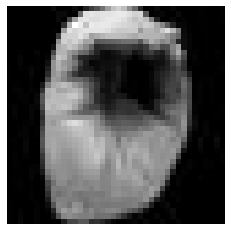

In [119]:
# hide axes
plt.imshow(pixels, cmap='gray')
plt.axis('off')
plt.show()

In [120]:
n_files = 0
for file in os.walk('./converted'):
    n_files += len(file[2])
n_files

700

In [121]:
X = np.zeros((n_files, w * h), dtype=np.uint8)
# y - 10xn_files matrix of nulls
y = np.zeros((n_files, 10))

In [172]:
# save X and y to file .mat
y[0].shape

(10,)

In [122]:
y.shape

(700, 10)

In [123]:
for i, digit_dir in enumerate(os.listdir('./converted/')):
    for j, file_name in enumerate(os.listdir('./converted/' + digit_dir)):
        pixels = np.array(Image.open('./converted/' + digit_dir + '/' + file_name))  # 40x40 image
        # add vectorized image to X
        X[i * n_files // 10 + j, :] = pixels.reshape(1, -1)
        y[i * n_files // 10 + j, i] = 1

In [124]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [125]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [126]:
input_layer_size = 1600 + 1

In [127]:
hidden_layer_size = 2000
hidden_layer = np.zeros((hidden_layer_size, 1))

In [128]:
output_layer_size = 10
output_layer = np.zeros((output_layer_size, 1))

In [129]:
# theta1 - weights between input and hidden layer
Theta1 = np.random.rand(hidden_layer_size, w * h + 1) * 0.1

Theta2 = np.random.rand(output_layer_size, hidden_layer_size + 1) * 0.1

In [130]:
Theta1.shape

(2000, 1601)

In [131]:
input_layer = X[0]
hidden_layer = sigmoid(np.dot(Theta1[:, 1:], input_layer))

In [156]:
# random values of Theta1 shape
Theta1_grad = 0.02 + np.random.rand(Theta1.shape[0], Theta1.shape[1])

Theta2_grad = 0.02 + np.random.rand(*Theta2.shape)

In [133]:
def front_propagation(x_i):
    input_layer = np.append(1, x_i)

    hidden_layer = sigmoid(np.dot(Theta1, input_layer))
    hidden_layer = np.append(1, hidden_layer)

    output_layer = sigmoid(np.dot(Theta2, hidden_layer))

    for i in output_layer:
        if int(i) == 1:
            return i

In [134]:
def predict(image_path):
    pixels = np.array(Image.open(image_path))
    labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    return labels[front_propagation(pixels)]

In [136]:
# print(predict('./converted/0/hand1_0_bot_seg_1_cropped.jpeg'))

In [157]:
for t in range(X.shape[0]):
    a_1 = np.append(1, X[t]).reshape(1, -1).T
    z_2 = np.dot(Theta1, a_1)
    a_2 = np.append(1, sigmoid(z_2))
    z_3 = np.dot(Theta2, a_2)
    a_3 = sigmoid(z_3)
    y_t = y[t]
    delta_3 = a_3 - y_t
    aaaa = np.append(0, sigmoid_derivative(z_2))
    delta_2 = np.dot(Theta2.T, delta_3) * aaaa
    delta_2 = delta_2[1:].reshape(1, -1).T
    Theta1_grad = Theta1_grad + np.dot(delta_2, a_1.T)
    a_2 = a_2.reshape(1, -1).T
    delta_3 = delta_3.reshape(1, -1).T
    Theta2_grad = Theta2_grad + np.dot(delta_3, a_2.T)

Theta1_grad = (1 / X.shape[0]) * Theta1_grad
Theta2_grad = (1 / X.shape[0]) * Theta2_grad


In [169]:
from scipy.optimize import fmin_cg